<a href="https://colab.research.google.com/github/NBK-code/Demonstrations/blob/main/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees

In [43]:
%matplotlib inline 
#Produces plots next to the code itself

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [44]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


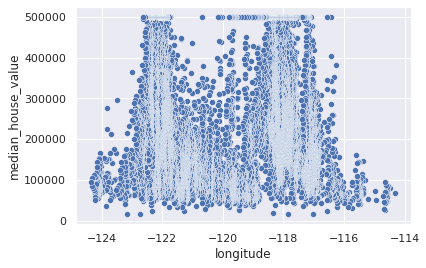

In [45]:
sns.scatterplot(x = df['longitude'], y = df['median_house_value'])

##Underfit Model

In [46]:
from sklearn.tree import DecisionTreeRegressor

X = df[['longitude']] #Two-dimensional (pd DataFrame)
y = df['median_house_value'] #One-dimensional (pd Series)

#Create an object (model)
dtr1 = DecisionTreeRegressor(max_depth=2, random_state=1)

#Fit (train) the model
dtr1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

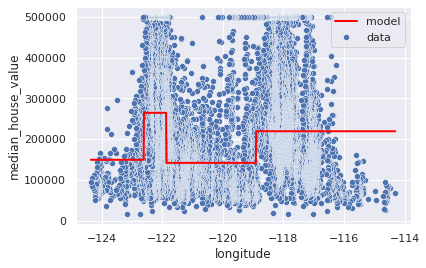

In [47]:
sns.scatterplot(x=df['longitude'],
                y=df['median_house_value'],
                label='data')

plt.plot(df['longitude'].sort_values(),       
         dtr1.predict(df['longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()

In [48]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr1, feature_names=['longitude'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

There will be 4 leaf nodes. The hyperparameter max_depth (set as 2) controls this.

##Overfit Model

In [49]:
#Create an object (model)
dtr2 = DecisionTreeRegressor(max_depth=15, random_state=1)

#Fit (train) the model
dtr2.fit(X, y)

DecisionTreeRegressor(max_depth=15, random_state=1)

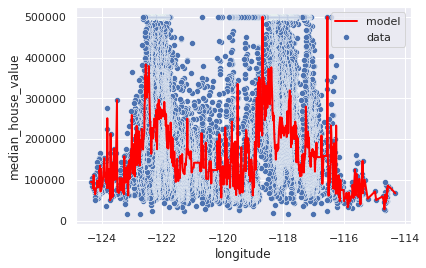

In [50]:
sns.scatterplot(x=df['longitude'],
                y=df['median_house_value'],
                label='data')

plt.plot(df['longitude'].sort_values(),       
         dtr2.predict(df['longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()

The main hyperparameter to tune is max_depth.

##Hyperparameter Tuning

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=0,
                                                    shuffle=True)

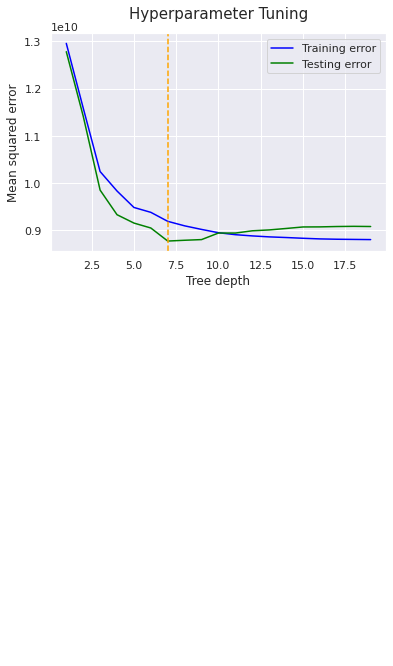

In [52]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
testing_error = []
for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    training_error.append(mse(y_train, model.predict(X_train)))
    testing_error.append(mse(y_test, model.predict(X_test)))
    
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

Model without any max_depth specified.

In [53]:
from sklearn.metrics import mean_squared_error as mse
model_ = DecisionTreeRegressor()
model_.fit(X_train, y_train)
print("Training mse:", mse(y_train, model_.predict(X_train)))
print("Testing mse:", mse(y_test, model_.predict(X_test)))

Training mse: 8793978636.171904
Testing mse: 9086729265.69013


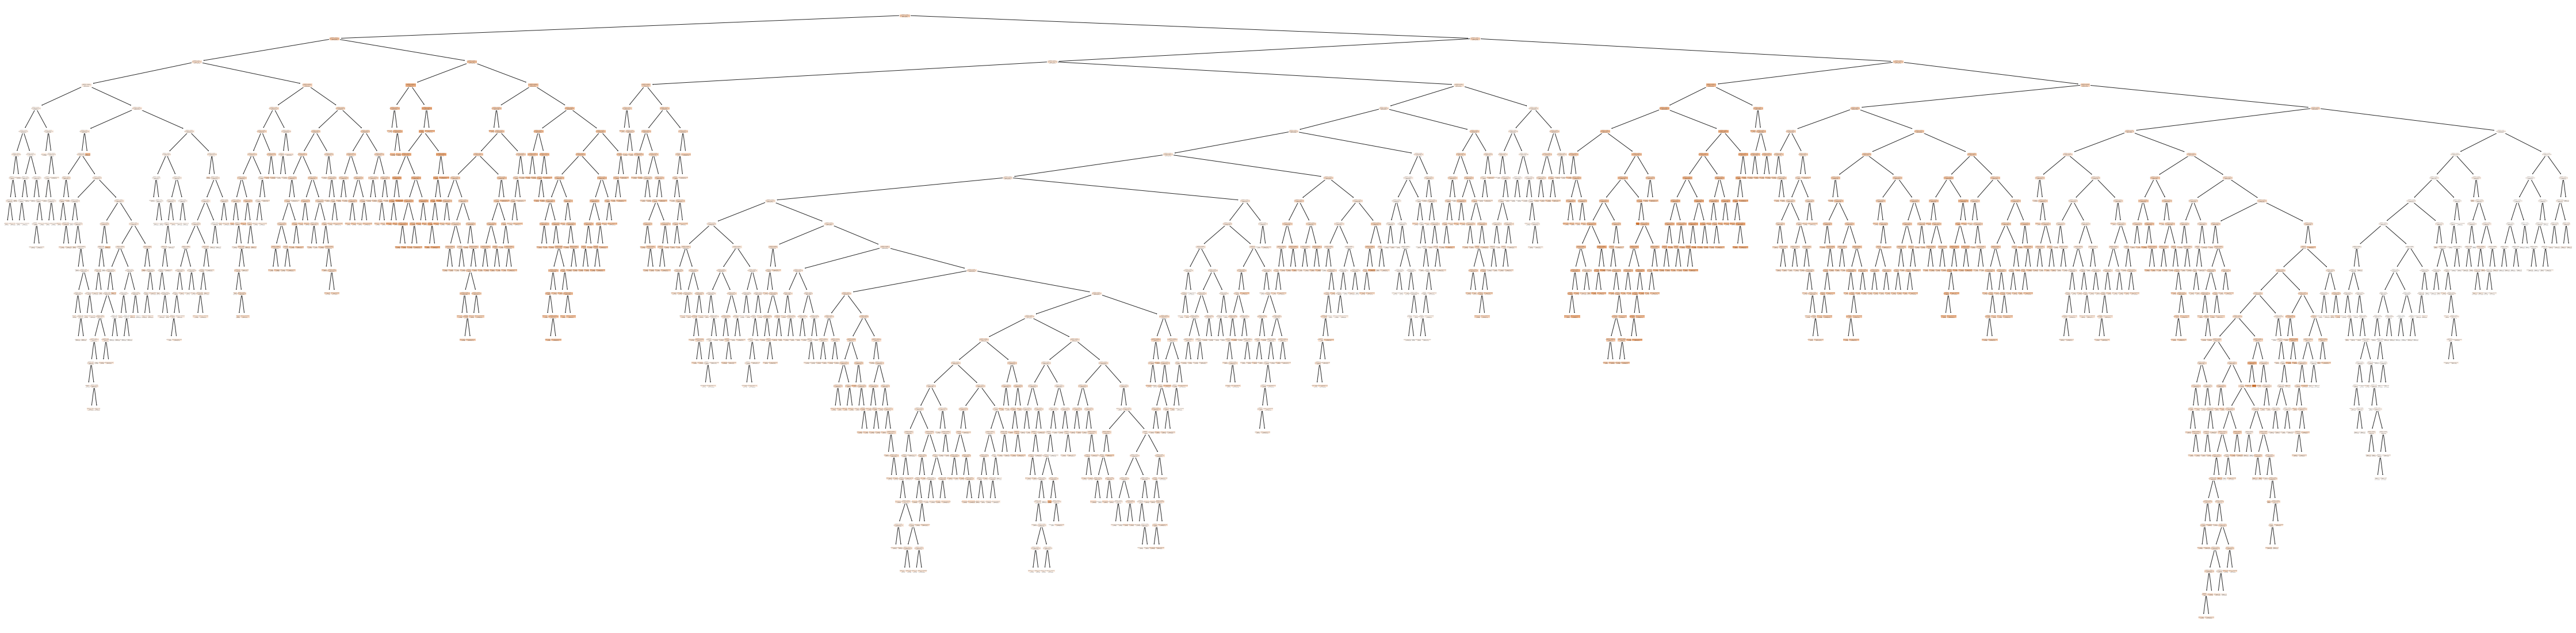

In [54]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model_, feature_names=X_train.columns, filled=True);
